(ar1)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

(ar1_processes)=
# AR(1) 过程

```{index} single: 自回归过程
```

## 概览

在这个讲座中，我们将研究一类非常简单的随机模型，称为 AR(1) 过程。

这些简单的模型在经济研究中一次又一次地被用来表示诸如

* 劳动收入
* 股息
* 生产力等序列的动态。

我们之所以研究 AR(1) 过程，部分是因为它们很有用，部分是因为它们帮助我们理解很多非常重要的概念。

让我们从一些导入开始：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  # 设置默认图像大小

## AR(1) 模型

**AR(1) 模型**（一阶自回归模型）形式是：

```{math}
:label: can_ar1

X_{t+1} = a X_t + b + c W_{t+1}
```

其中 $a, b, c$ 是标量参数

(方程 {eq}`can_ar1` 有时被称为 **随机差分方程**。)

```{prf:example}
:label: ar1_ex_ar

例如，$X_t$ 可能是

* 某个家庭的劳动收入对数，或
* 某个经济体的货币需求对数。

在两种情况下，{eq}`can_ar1` 显示当前值是通过上一个值的线性函数以及一个独立同分布的冲击 $W_{t+1}$ 来演变的。

(我们使用 $t+1$ 作为 $W_{t+1}$ 的下标，因为在时间 $t$ 这个随机变量还未被观察到。)
```

一旦我们指定一个初始条件 $X_0$，我们就可以用{eq}`can_ar1` 生成一个时间序列 $\{ X_t\}$。

为了使事情变得更简单，我们将假设

* 过程 $\{ W_t \}$ 是 {ref}`独立同分布 <iid-theorem>` 且符合标准正态分布，
* 初始条件 $X_0$ 从正态分布 $N(\mu_0, v_0)$ 中抽取，
* 初始条件 $X_0$ 与 $\{ W_t \}$ 独立。

### 移动平均表示

从时间 $t$ 向后迭代，我们得到

$$
X_t = a X_{t-1} + b +  c W_t
        = a^2 X_{t-2} + a b + a c W_{t-1} + b + c W_t
        = a^3 X_{t-3} + a^2 b + a^2 c W_{t-2} + b + c W_t
        = \cdots
$$

如果我们一直追溯到零时，我们得到

```{math}
:label: ar1_ma

X_t = a^t X_0 + b \sum_{j=0}^{t-1} a^j +
        c \sum_{j=0}^{t-1} a^j  W_{t-j}
```

方程 {eq}`ar1_ma` 显示 $X_t$ 是一个明确定义的随机变量，其值取决于

* 参数，
* 初始条件 $X_0$ 和
* 从时间 $t=1$ 到现在的冲击 $W_1, \ldots W_t$。

在整个过程中，符号 $\psi_t$ 将用来指代这个随机变量 $X_t$ 的密度。

### 分布动态

这个模型的一个好处是很容易追踪一系列分布 $\{ \psi_t \}$，这些分布对应于时间
序列 $\{ X_t\}$ 的现实演变。具体来说，我们可以在每个日期 $t$ 上追踪观测到的 $X_t$ 的边际分布。

让我们看看我们如何做到这一点。

首先我们指出，对于每个时间 $t$，$X_t$ 是正态分布的。

这是从 {eq}`ar1_ma` 显见的，因为独立正态随机变量的线性组合是正态分布的。

鉴于 $X_t$ 是正态分布的，如果我们能确定它的前两个[矩](https://en.wikipedia.org/wiki/Moment_(mathematics))，就可以知道完整的分布 $\psi_t$。

设 $\mu_t$ 和 $v_t$ 分别表示 $X_t$ 的均值和方差。

我们可以从 {eq}`ar1_ma` 确定这些值，或者我们可以使用以下递归表达式：

```{math}
:label: dyn_tm

\mu_{t+1} = a \mu_t + b
\quad 	ext{和} \quad
v_{t+1} = a^2 v_t + c^2
```

通过分别取等式两侧的期望和方差，从 {eq}`can_ar1` 得到这些表达式。

在计算第二个表达式时，我们利用了 $X_t$ 和 $W_{t+1}$ 的独立性。

(这是根据我们的假设和 {eq}`ar1_ma` 得出的。)

给定 {eq}`ar1_ma` 中的动态和初始条件 $\mu_0, v_0$，我们得到 $\mu_t, v_t$，因此

$$
\psi_t = N(\mu_t, v_t)
$$

下面的代码利用这些事实来追踪边际分布序列 $\{ \psi_t \}$。

参数是

In [2]:
a, b, c = 0.9, 0.1, 0.5

mu, v = -3.0, 0.6  # 初始条件 mu_0, v_0

以下是分布序列：

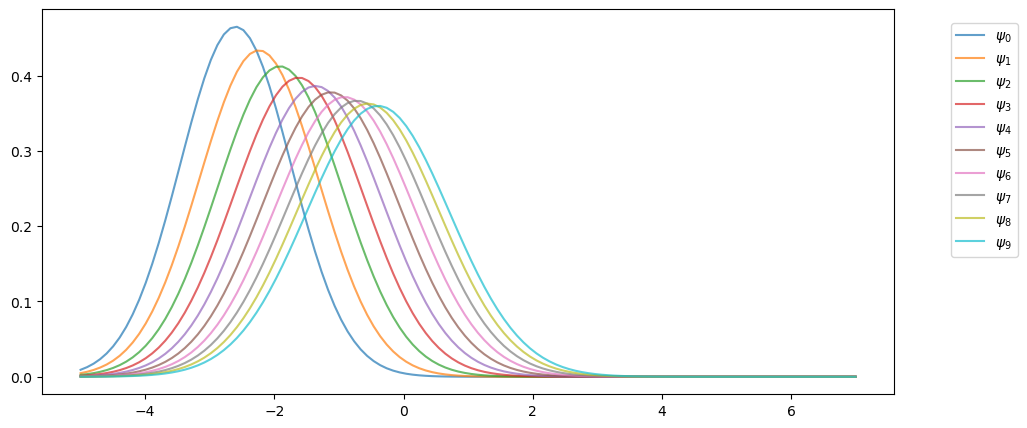

In [3]:
from scipy.stats import norm

sim_length = 10
grid = np.linspace(-5, 7, 120)

fig, ax = plt.subplots()

for t in range(sim_length):
    mu = a * mu + b
    v = a**2 * v + c**2
    ax.plot(grid, norm.pdf(grid, loc=mu, scale=np.sqrt(v)),
            label=f"$\psi_{t}$",
            alpha=0.7)

ax.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=1)

plt.show()

## 平稳性和渐近稳定性

当我们使用模型来研究现实世界时，通常希望我们的模型具有清晰准确的预测。

对于动态问题，清晰的预测与稳定性有关。

例如，如果一个动态模型预测通货膨胀总是收敛到某种稳态，那么这个模型提供了一个明确的预测。

（预测可能是错误的，但即便如此，它也是有帮助的，因为我们可以判断模型的质量。）

注意，在上图中，序列 $\{ \psi_t \}$ 似乎正在收敛到一个极限分布，这表明存在某种稳定性。

如果我们进一步向未来进行投影，这一点就更加明显：

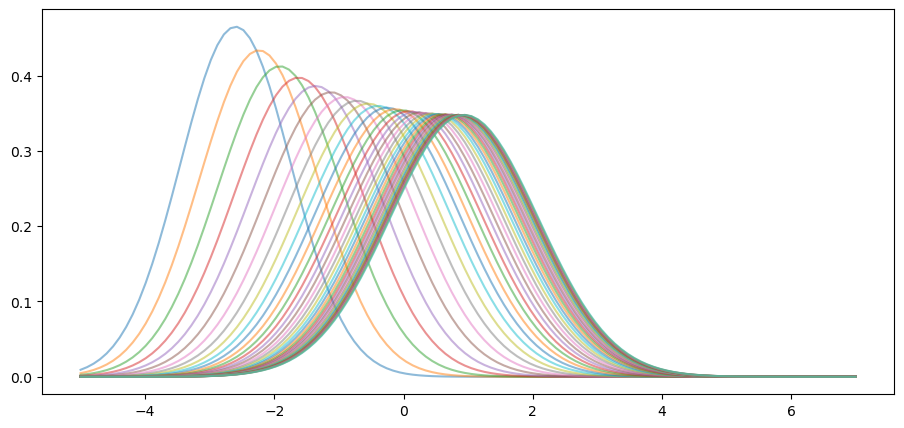

In [4]:
def plot_density_seq(ax, mu_0=-3.0, v_0=0.6, sim_length=40):
    mu, v = mu_0, v_0
    for t in range(sim_length):
        mu = a * mu + b
        v = a**2 * v + c**2
        ax.plot(grid,
                norm.pdf(grid, loc=mu, scale=np.sqrt(v)),
                alpha=0.5)

fig, ax = plt.subplots()
plot_density_seq(ax)
plt.show()

此外，极限不依赖于初始条件。

例如，另一个密度序列也会收敛到相同的极限。

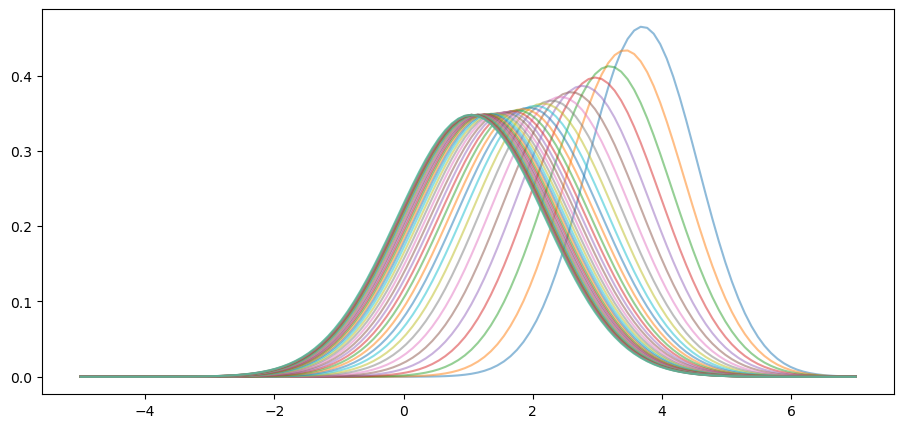

In [5]:
fig, ax = plt.subplots()
plot_density_seq(ax, mu_0=4.0)
plt.show()

事实上，可以很容易地证明，只要 $|a| < 1$，不管初始条件如何，都会发生这种收敛。

为了看到这一点，我们只需查看前两个矩的动态，
如 {eq}`dyn_tm` 中所给出的。

当 $|a| < 1$ 时，这些序列会收敛到各自的极限

```{math}
:label: mu_sig_star

\mu^* := \frac{b}{1-a}
\quad 和 \quad
v^* = \frac{c^2}{1 - a^2}
```

（请参阅我们的 {doc}`一维动力学讲座 <scalar_dynam>`，了解确定性收敛的背景。）

因此

```{math}
:label: ar1_psi_star

\psi_t \to \psi^* = N(\mu^*, v^*)
\quad 当
t \to \infty
```

我们可以使用以下代码确认这对于上面的序列是有效的。

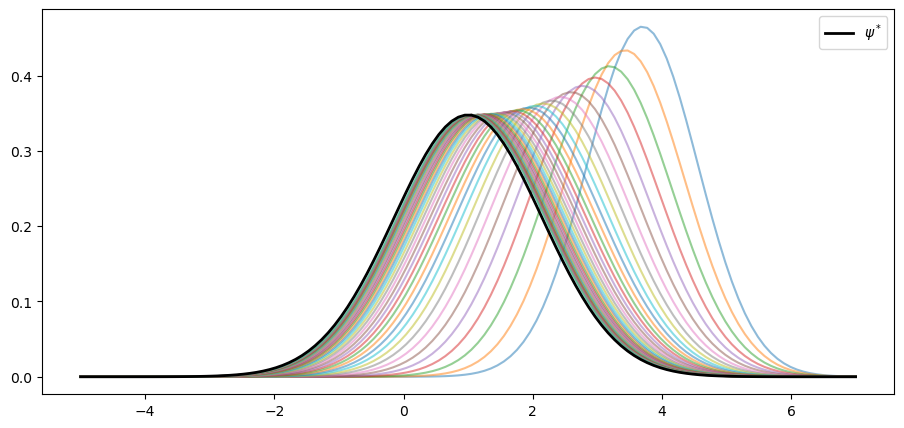

In [6]:
fig, ax = plt.subplots()
plot_density_seq(ax, mu_0=4.0)

mu_star = b / (1 - a)
std_star = np.sqrt(c**2 / (1 - a**2))  # v_star的平方根
psi_star = norm.pdf(grid, loc=mu_star, scale=std_star)
ax.plot(grid, psi_star, 'k-', lw=2, label="$\psi^*$")
ax.legend()

plt.show()

请注意，根据上述参数，我们看到序列 $\{ \psi_t \}$ 收敛到 $\psi^*$。

我们看到，至少对于这些参数，AR(1) 模型具有很强的稳定性特性。

### 平稳分布

让我们更好地理解极限分布 $\psi^*$。

平稳分布是 AR(1) 过程更新规则的一个“固定点”。

换句话说，如果 $\psi_t$ 是平稳的，那么对所有 $j$，$\psi_{t+j} = \psi_t$ 在 $\mathbb N$ 中成立。

另一种针对当前设置的说法是：如果一个在 $\mathbb R$ 上的密度 $\psi$ 对 AR(1) 过程是**平稳的**，则有

$$
X_t \sim \psi
\quad \implies \quad
a X_t + b + c W_{t+1} \sim \psi
$$

$\psi^*$ 在 {eq}`ar1_psi_star` 中具有这一性质——检查这一点是一个练习。

（当然，我们假设 $|a| < 1$ 从而 $\psi^*$ 是
良定义的。）

事实上，可以证明 $\mathbb R$ 上没有其他分布具有这一性质。

因此，当 $|a| < 1$ 时，AR(1) 模型恰好有一个平稳密度，那就是 $\psi^*$。

## 遍历性

不同的作者使用遍历性这一概念有不同的方式。

在当前设定中理解它的一种方式是，即使 $\{X_t\}$ 不是独立同分布的，大数定律也是有效的。

特别是，时间序列的平均值收敛于平稳分布下的期望值。

实际上，可以证明，只要 $|a| < 1$，我们就有

```{math}
:label: ar1_ergo

\frac{1}{m} \sum_{t = 1}^m h(X_t) \to
\int h(x) \psi^*(x) dx
    \quad 当 m \to \infty
```

只要右侧的积分是有限且良定义的。

注意：

* 在 {eq}`ar1_ergo` 中，收敛性以概率1成立。
* 由 {cite}`MeynTweedie2009` 编写的教科书是关于遍历性的经典参考。

```{prf:example}
:label: ar1_ex_id

如果我们考虑恒等函数 $h(x) = x$，我们得到

$$
\frac{1}{m} \sum_{t = 1}^m X_t \to
\int x \psi^*(x) dx
    \quad \text{当 } m \to \infty
$$

即，时间序列样本均值收敛于平稳分布的均值。
```

出于多种原因，遍历性非常重要。

例如，{eq}`ar1_ergo` 可用来测试理论。

在这个方程中，我们可以使用观测数据来评估 {eq}`ar1_ergo` 的左侧。

我们可以使用理论的 AR(1) 模型来计算右侧。

如果 $\frac{1}{m} \sum_{t = 1}^m X_t$ 即使在很多观测下也不接近 $\psi^*(x)$，那么我们的理论似乎是错误的，我们将需要修订它。


## 练习

```{exercise}
:label: ar1p_ex1

假设 $k$ 是一个自然数。

随机变量的 $k$ 阶中心矩定义为

$$
M_k := \mathbb E [ (X - \mathbb E X )^k ]
$$

当这个随机变量是 $N(\mu, \sigma^2)$ 时，已知

$$
M_k =
\begin{cases}
    0 & 如果 k 是奇数 \\
    \sigma^k (k-1)!! & 如果 k 是偶数
\end{cases}
$$

这里 $n!!$ 是[双阶乘](https://en.wikipedia.org/wiki/Double_factorial)。

根据 {eq}`ar1_ergo`, 对于任何 $k \in \mathbb N$，

$$
\frac{1}{m} \sum_{t = 1}^m
    (X_t - \mu^* )^k
    \approx M_k
$$

当 $m$ 是较大时。

通过仿真验证一系列 $k$，使用讲座中的默认参数。
```


```{solution-start} ar1p_ex1
:class: dropdown
```

这是一个解法：

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

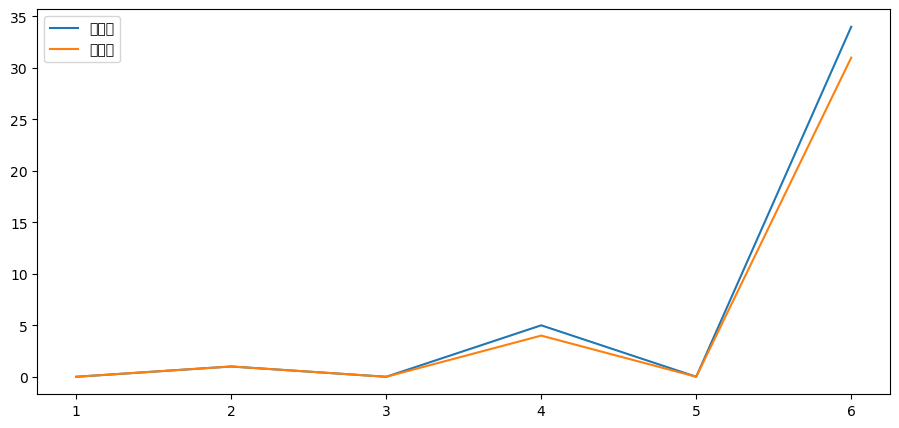

In [7]:
from numba import njit
from scipy.special import factorial2

@njit
def sample_moments_ar1(k, m=100_000, mu_0=0.0, sigma_0=1.0, seed=1234):
    np.random.seed(seed)
    sample_sum = 0.0
    x = mu_0 + sigma_0 * np.random.randn()
    for t in range(m):
        sample_sum += (x - mu_star)**k
        x = a * x + b + c * np.random.randn()
    return sample_sum / m

def true_moments_ar1(k):
    if k % 2 == 0:
        return std_star**k * factorial2(k - 1)
    else:
        return 0

k_vals = np.arange(6) + 1
sample_moments = np.empty_like(k_vals)
true_moments = np.empty_like(k_vals)

for k_idx, k in enumerate(k_vals):
    sample_moments[k_idx] = sample_moments_ar1(k)
    true_moments[k_idx] = true_moments_ar1(k)

fig, ax = plt.subplots()
ax.plot(k_vals, true_moments, label="真实矩")
ax.plot(k_vals, sample_moments, label="样本矩")
ax.legend()

plt.show()

```{solution-end}
```

```{exercise}
:label: ar1p_ex2

编写一个一维[核密度估计](https://en.wikipedia.org/wiki/Kernel_density_estimation)的版本，用于从样本中估计密度。

将其写为一个类，该类在初始化时接受数据 $X$ 和带宽 $h$，并提供一个方法 $f$，使得

$$
f(x) = \frac{1}{hn} \sum_{i=1}^n
K \left( \frac{x-X_i}{h} \right)
$$

对于 $K$，使用高斯核（$K$ 是标准正态密度函数）。

编写该类，使得带宽默认遵循 Silverman 的规则（参见[此页面](https://en.wikipedia.org/wiki/Kernel_density_estimation)中的“经验规则”讨论）。通过以下步骤测试你编写的类：

1. 从分布 $\phi$ 中模拟数据 $X_1, \ldots, X_n$
1. 在适当的范围内绘制核密度估计
1. 在同一图形上绘制 $\phi$ 的密度

分布 $\phi$ 类型如下：

- [beta 分布](https://en.wikipedia.org/wiki/Beta_distribution)，$\alpha = \beta = 2$
- [beta 分布](https://en.wikipedia.org/wiki/Beta_distribution)，$\alpha = 2$ 且 $\beta = 5$
- [beta 分布](https://en.wikipedia.org/wiki/Beta_distribution)，$\alpha = \beta = 0.5$

使用 $n=500$。

对结果进行评论。（你认为这是这些分布的良好估计吗？）
```

```{solution-start} ar1p_ex2
:class: dropdown
```

这是一个解决方案：

In [8]:
K = norm.pdf

class KDE:

    def __init__(self, x_data, h=None):

        if h is None:
            c = x_data.std()
            n = len(x_data)
            h = 1.06 * c * n**(-1/5)
        self.h = h
        self.x_data = x_data

    def f(self, x):
        if np.isscalar(x):
            return K((x - self.x_data) / self.h).mean() * (1/self.h)
        else:
            y = np.empty_like(x)
            for i, x_val in enumerate(x):
                y[i] = K((x_val - self.x_data) / self.h).mean() * (1/self.h)
            return y

In [9]:
def plot_kde(ϕ, x_min=-0.2, x_max=1.2):
    x_data = ϕ.rvs(n)
    kde = KDE(x_data)

    x_grid = np.linspace(-0.2, 1.2, 100)
    fig, ax = plt.subplots()
    ax.plot(x_grid, kde.f(x_grid), label="估计值")
    ax.plot(x_grid, ϕ.pdf(x_grid), label="真实密度")
    ax.legend()
    plt.show()

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

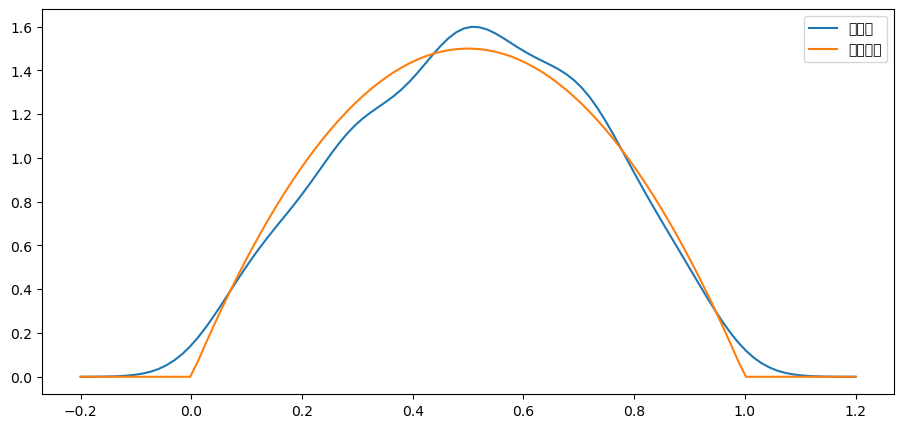

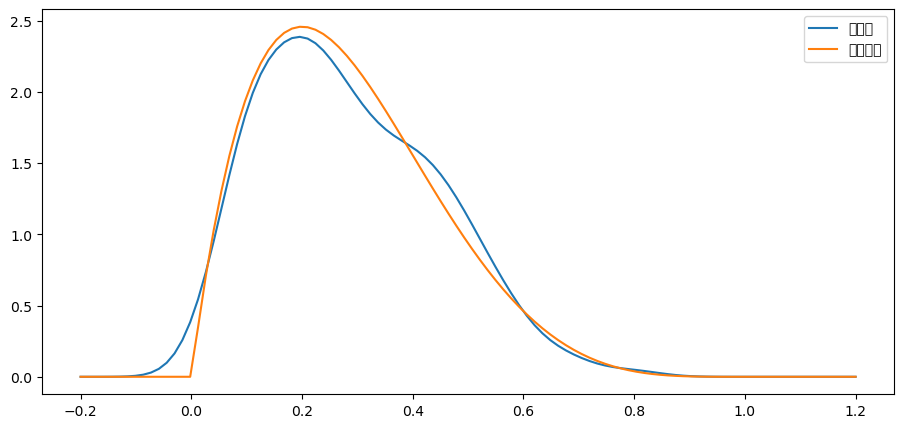

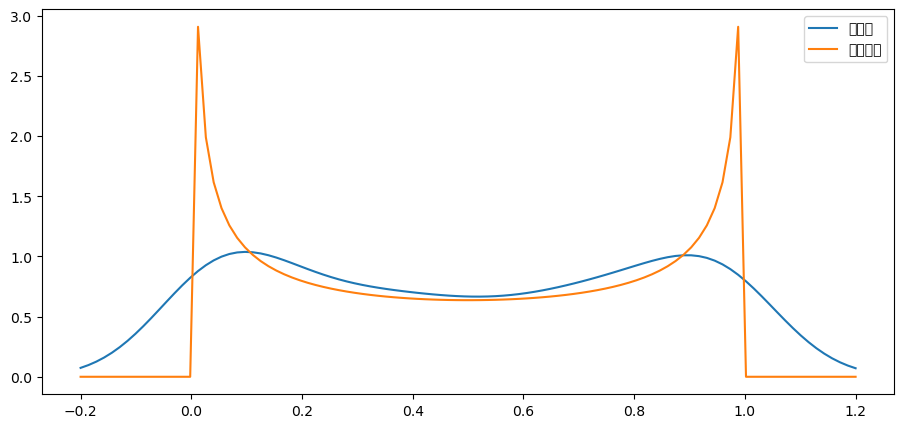

In [10]:
from scipy.stats import beta

n = 500
parameter_pairs= (2, 2), (2, 5), (0.5, 0.5)
for α, β in parameter_pairs:
    plot_kde(beta(α, β))

我们可以看到，当基础分布是平滑时，核密度估计器是有效的，但在其他情况下则效果不佳。

```{solution-end}
```


```{exercise}
:label: ar1p_ex3

在讲座中我们讨论了以下事实：对于 $AR(1)$ 过程

$$
X_{t+1} = a X_t + b + c W_{t+1}
$$

其中 $\{ W_t \}$ 独立同分布且标准正态，

$$
\psi_t = N(\mu, s^2) \implies \psi_{t+1}
= N(a \mu + b, a^2 s^2 + c^2)
$$

通过仿真确认这一点，至少是近似的。设定

- $a = 0.9$
- $b = 0.0$
- $c = 0.1$
- $\mu = -3$
- $s = 0.2$

首先，使用上述真实分布绘制 $\psi_t$ 和 $\psi_{t+1}$。

其次，在同一个图形上（用不同的颜色），绘制 $\psi_{t+1}$ 如下：

1. 从分布 $N(\mu, s^2)$ 中生成 $n$ 次 $X_t$ 抽样
1. 使用规则 $X_{t+1} = a X_t + b + c W_{t+1}$ 更新它们所有
1. 使用 $X_{t+1}$ 的结果样本产生通过核密度估计的密度估计。

尝试 $n=2000$ 并确认基于抽样实验的 $\psi_{t+1}$ 估计会收敛到理论分布。
```

```{solution-start} ar1p_ex3
:class: dropdown
```

这是我们的解决方案

In [11]:
a = 0.9
b = 0.0
c = 0.1
μ = -3
s = 0.2

```python
n = 2000  # 样本数

# 理论上的分布
μ_next = a * μ + b
s_next = np.sqrt(a**2 * s**2 + c**2)

# 理论密度
ψ = norm(μ, s)
ψ_next = norm(μ_next, s_next)

# 使用仿真值来估计ψ_{t+1}
x_draws = ψ.rvs(n)  # 从ψ生成样本
x_draws_next = a * x_draws + b + c * np.random.randn(n)  # 更新规则

# 对仿真结果进行核密度估计
kde = KDE(x_draws_next)

# 绘制结果
x_grid = np.linspace(μ - 1, μ + 1, 100)
fig, ax = plt.subplots()

ax.plot(x_grid, ψ.pdf(x_grid), label="$\psi_t$")
ax.plot(x_grid, ψ_next.pdf(x_grid), label="$\psi_{t+1}$")
ax.plot(x_grid, kde.f(x_grid), label="estimate of $\psi_{t+1}$")

ax.legend()
plt.show()
```

正如预测的那样，模拟分布与理论分布大致吻合。

```{solution-end}
```